# importing libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("Fraud.csv")
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
801646,40,CASH_OUT,293180.43,C1792386860,165040.00,0.00,C1554074254,471941.96,765122.40,0,0
936340,43,CASH_OUT,113992.67,C460802713,18066.06,0.00,C701143890,448859.82,562852.49,0,0
2274097,187,PAYMENT,8650.01,C822687505,254190.93,245540.92,M250218493,0.00,0.00,0,0
3443330,257,PAYMENT,3219.00,C2069988820,0.00,0.00,M186419472,0.00,0.00,0,0
209659,13,CASH_OUT,13272.19,C1465500489,157674.43,144402.24,C2017316564,148297.05,161569.24,0,0


# Data cleaning

In [3]:
df.shape

(6362620, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
df["isFraud"].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [8]:
df["isFlaggedFraud"].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [9]:
df["type"].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

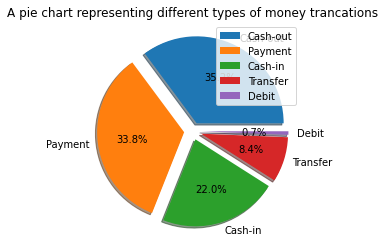

In [10]:
labels = ['Cash-out','Payment','Cash-in','Transfer','Debit']
size = [2237500,2151495,1399284,532909,41432]
explode = [0.1, 0.1 ,0.1 ,0.1 ,0.1]
plt.rcParams['figure.figsize'] = (10,8)
plt.pie(size, explode = explode, labels = labels, shadow = True, autopct='%1.1f%%')
plt.title('A pie chart representing different types of money trancations')
plt.axis('off')
plt.legend()
plt.show()

C:\Users\signi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


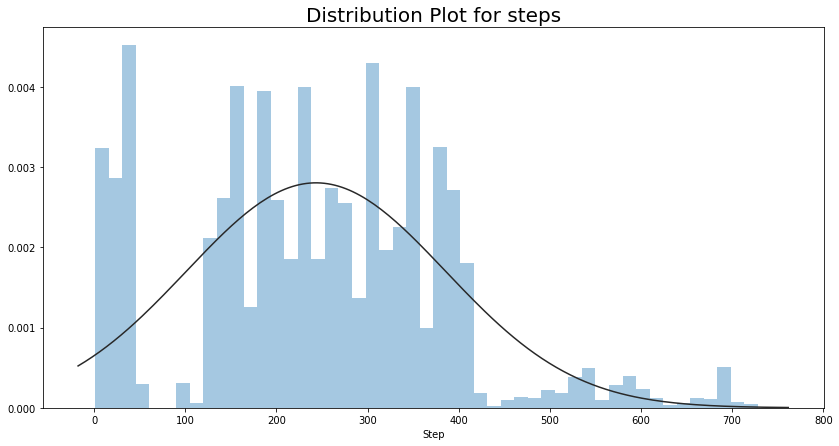

In [11]:
plt.rcParams['figure.figsize'] =(14, 7)

# importing norm
from scipy.stats import norm

sns.distplot(df.step, fit = norm, kde = False)
plt.title('Distribution Plot for steps', fontsize = 20)
plt.xlabel('Step', fontsize = 10)
plt.show()
     

In [12]:
# Types of fraudulent transaction out of all the transaction modes.

print('The Types of fraudulent transactions are {}'.format(list(df.loc[df.isFraud == 1].type.drop_duplicates().values)) )
     

The Types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']


In [13]:
# Total fraud transfer and fraud cash outs
FraudTransfer = df.loc[(df.isFraud ==1) & (df.type == 'TRANSFER')]
FraudCashout = df.loc[(df.isFraud ==1) & (df.type == 'CASH_OUT')]

# Number of the fradulent transfers and cash outs
print('The number of fradulent TRANSFER = {}'.format(len(FraudTransfer)))
print('The number of fradulent CASH_OUT = {}'.format(len(FraudCashout)))

The number of fradulent TRANSFER = 4097
The number of fradulent CASH_OUT = 4116


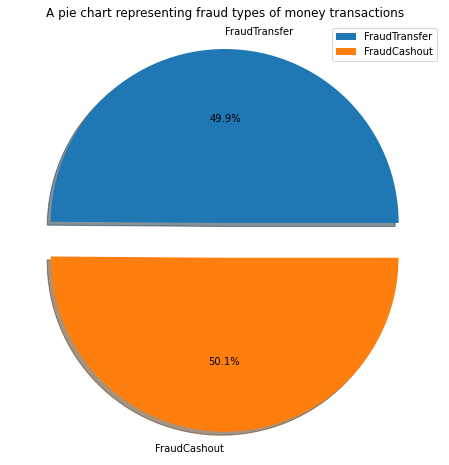

In [14]:
labels = ['FraudTransfer','FraudCashout']
size = [4097,4116]
explode = [0.1,0.1]
plt.rcParams['figure.figsize'] = (10,8)
plt.pie(size,explode = explode, labels = labels, shadow = True, autopct="%1.1f%%")
plt.title('A pie chart representing fraud types of money transactions')
plt.axis('off')
plt.legend()
plt.show()

In [38]:
# Minimum and maximum transaction from transfer and cash out transaction mode when it is set to be fraud

print("Transfer Transaction")
print("Min Transaction :", df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')].amount.min())
print("Max Transaction :", df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')].amount.max())

print("\nCASH_OUT Transaction")
print("Min Transaction :", df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')].amount.min() )
print("Max Transaction :", df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')].amount.max())

Transfer Transaction
Min Transaction : 63.8
Max Transaction : 10000000.0

CASH_OUT Transaction
Min Transaction : 0.0
Max Transaction : 10000000.0


In [16]:
# finding out the transactions which are flagged to be fraud

print("The Type of Transaction in which IsFlagged:", df.loc[df.isFlaggedFraud == 1].type.drop_duplicates().values)
     

The Type of Transaction in which IsFlagged: ['TRANSFER']


In [17]:
FlaggedFraud = df.loc[(df.isFlaggedFraud == 1) & (df.type == 'TRANSFER')]
print("The no of Flagged Fradulent Transactions:", len(FlaggedFraud))

The no of Flagged Fradulent Transactions: 16


In [18]:
print("Min Transaction :",df.loc[df.isFlaggedFraud == 1].amount.min())
print("Max Transaction :",df.loc[df.isFlaggedFraud == 1].amount.max())

Min Transaction : 353874.22
Max Transaction : 10000000.0


In [19]:
# Types of Fraud Transactions
fraud_trans = list(df.loc[df.isFraud==1].type.drop_duplicates().values)
print("Types of transactions that have Frauds:",fraud_trans)

Types of transactions that have Frauds: ['TRANSFER', 'CASH_OUT']


In [22]:
# Remoiving the data which do not having fradulent transaction
new_df = df.loc[(df['type'].isin(['TRANSFER','CASH_OUT'])),:]
new_df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3454987,257,CASH_OUT,75136.07,C1479420683,0.0,0.0,C161259209,865922.31,941058.39,0,0
3353013,254,CASH_OUT,211823.74,C886581792,0.0,0.0,C1862044056,1801061.06,2012884.81,0,0
2410730,202,TRANSFER,50713.40,C1218162270,0.0,0.0,C424474864,272381.10,323094.50,0,0
3281052,251,CASH_OUT,134177.02,C745805130,1403.0,0.0,C14465666,347145.85,481322.87,0,0
4318814,308,CASH_OUT,190344.87,C895465663,0.0,0.0,C1577082040,1497320.84,1687665.71,0,0


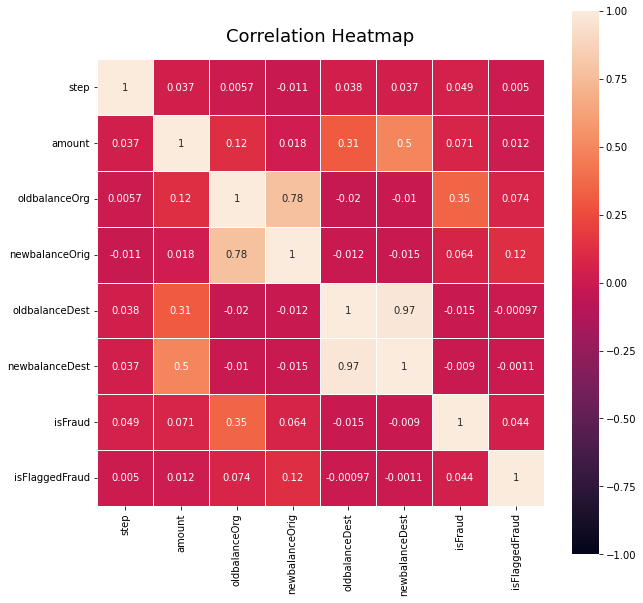

<Figure size 2880x2880 with 0 Axes>

In [23]:
# correlation Heatmap
corrMatrix = new_df.corr()
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(corrMatrix, annot=True, vmin = -1,vmax = 1, linewidths =1, square = 'true')
heatmap.set_title("Correlation Heatmap",fontdict={'fontsize':18},pad=18)
plt.figure(figsize=(40,40))
plt.show()

In [24]:
# making dependent and independent sets
X = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]
X.shape

(2770409, 11)

In [25]:
X.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4804188,346,CASH_OUT,325768.59,C1876932465,198734.0,0.0,C1142820190,2063.00,297883.65,0,0
5632310,395,CASH_OUT,129670.64,C272018327,30434.0,0.0,C1310648867,211443.69,341114.33,0,0
3340914,253,CASH_OUT,242644.37,C1656319532,0.0,0.0,C1468191850,4430348.19,4672992.56,0,0
1850904,164,CASH_OUT,14462.33,C1481639445,0.0,0.0,C1640823743,51087.18,65549.51,0,0
801982,40,CASH_OUT,207385.25,C1782584628,0.0,0.0,C2057824850,418878.63,626263.88,0,0


In [26]:
X['errorBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
X['errorBalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest     

C:\Users\signi\AppData\Local\Temp\ipykernel_9584\1712845584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['errorBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
C:\Users\signi\AppData\Local\Temp\ipykernel_9584\1712845584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['errorBalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest


In [27]:
# removing unwanted columns

X = X.drop(['nameDest','nameOrig'], axis = 1)

# checking the new shape of data
X.shape

(2770409, 11)

In [28]:
# Label encoding for the transaction type  

X['type'].replace('TRANSFER',0,inplace = True)
X['type'].replace('CASH_OUT',1,inplace = True)

In [29]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.0,0.0,0.0,0.00,1,0,0.00,181.0
3,1,1,181.00,181.0,0.0,21182.0,0.00,1,0,0.00,21363.0
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44,0,0,213808.94,182703.5
19,1,0,215310.30,705.0,0.0,22425.0,0.00,0,0,214605.30,237735.3
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89,0,0,300850.89,-2401220.0


In [30]:
X.isnull().any().any()

False

In [31]:
X.sample(5)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
4890137,349,1,181473.94,46130.04,0.0,200170.86,381644.80,0,0,135343.90,0.000000e+00
2823762,226,1,315024.30,1039.00,0.0,40859.41,355883.71,0,0,313985.30,-5.820766e-11
2825962,226,1,23940.73,661.00,0.0,951457.55,975398.28,0,0,23279.73,0.000000e+00
1275225,135,1,50877.59,49741.00,0.0,8253.00,59130.59,0,0,1136.59,0.000000e+00
1271993,135,1,348019.97,0.00,0.0,2424385.32,2951873.00,0,0,348019.97,-1.794677e+05


In [32]:
# making our independent set
Y = X['isFraud']

X = X.drop(['isFraud'],axis = 1)

#getting the shapes of x and y
print("Shape of x:",X.shape)
print("Shape of y:",Y.shape)

Shape of x: (2770409, 10)
Shape of y: (2770409,)


In [33]:
# Splitting the dataset into train and tests
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state = 0)

In [34]:
# Performing standard scaling on the data 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [62]:
from sklearn.linear_model import LogisticRegression

In [65]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train,y_train)

LogisticRegression()

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [67]:
# Accuracy score
print(accuracy_score(predictions, y_test))

0.9999711234077266


In [70]:
# Classification report
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552436
           1       1.00      0.99      1.00      1646

    accuracy                           1.00    554082
   macro avg       1.00      1.00      1.00    554082
weighted avg       1.00      1.00      1.00    554082



In [35]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [56]:
predictions = decision_tree.predict(x_test)

In [57]:
# Accuracy Score
print(accuracy_score(predictions, y_test))

0.9999711234077266


In [59]:
# Classification report
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552436
           1       1.00      0.99      1.00      1646

    accuracy                           1.00    554082
   macro avg       1.00      1.00      1.00    554082
weighted avg       1.00      1.00      1.00    554082



In [71]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
random_forest = DecisionTreeClassifier()
random_forest.fit(x_train, y_train)

DecisionTreeClassifier()

In [76]:
predictions = random_forest.predict(x_test)

In [77]:
# Accuracy Score
print(accuracy_score(predictions, y_test))

0.9999747329817609


In [78]:
# Classification report
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552436
           1       1.00      0.99      1.00      1646

    accuracy                           1.00    554082
   macro avg       1.00      1.00      1.00    554082
weighted avg       1.00      1.00      1.00    554082



In [79]:
# Confusion matrix
print(confusion_matrix(predictions, y_test))

[[552434      2]
 [    12   1634]]
